**=======<<<< Check what loan_status does not meet credit policy mean >>>============**

# 1. Introduction

Kaggle has a dataset that contains loan data issued by the Lending Club from 2007-2015 including the current loan status.

From their website, all their personal loans are fixed rate loans.  The “int rate” column in the dataset indicates the fixed rate when the loan was originated.

To check if the Lending Club’s risk model is functioning well, the int rate can be compared between loans that were paid off and loans that didn’t perform well.

This info could be used by Lending Club executives, investors, and even competitors.


# 2. Hypothesis

Ho: There is no significant difference between the int rate charged for the loans that resulted in being delinquent vs loans that were paid off.

Ha: There is a significant difference between the int rate charged for the loans that resulted in being delinquent vs loans that were paid off.

# 3. Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lending-club-loan-data/database.sqlite
/kaggle/input/lending-club-loan-data/LCDataDictionary.xlsx
/kaggle/input/lending-club-loan-data/loan.csv


Load the data and take a peek

In [2]:
df = pd.read_csv('/kaggle/input/lending-club-loan-data/loan.csv')
df.info()
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


There are 145 columns.

Separate to ones with <20 unique columns and others

In [3]:
# first, display variables containing < 20 unique values
many_valued = []
prob_categorical = []
for column in df.columns:
    if(len(df[column].unique()) < 20):
        print(column, df[column].unique() )
        prob_categorical.append(column)
    else:
        many_valued.append(column)

id [nan]
member_id [nan]
term [' 36 months' ' 60 months']
grade ['C' 'D' 'B' 'A' 'E' 'F' 'G']
emp_length ['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' nan
 '5 years' '3 years' '7 years' '1 year' '8 years']
home_ownership ['RENT' 'MORTGAGE' 'OWN' 'ANY' 'NONE' 'OTHER']
verification_status ['Not Verified' 'Source Verified' 'Verified']
loan_status ['Current' 'Fully Paid' 'Late (31-120 days)' 'In Grace Period'
 'Charged Off' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
pymnt_plan ['n' 'y']
url [nan]
purpose ['debt_consolidation' 'credit_card' 'house' 'car' 'other' 'vacation'
 'home_improvement' 'small_business' 'major_purchase' 'medical'
 'renewable_energy' 'moving' 'wedding' 'educational']
initial_list_status ['w' 'f']
collections_12_mths_ex_med [ 0.  1.  2.  4.  3.  5.  6.  8.  9. 10.  7. 20. 11. 12. 14. 16. nan]
policy_code [1]
application_type ['Individual' 'Joint App']
verif

In [4]:
# display variables with >20 unique values
print('\n'.join(many_valued))

loan_amnt
funded_amnt
funded_amnt_inv
int_rate
installment
sub_grade
emp_title
annual_inc
issue_d
desc
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
mths_since_last_major_derog
annual_inc_joint
dti_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120

The loan status feature will be used to determine if a loan is performing well or not.

In [5]:
# The loan status feature is categorical and can be one of the following values:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Visualize interest rate vs loan status values using a boxplot.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

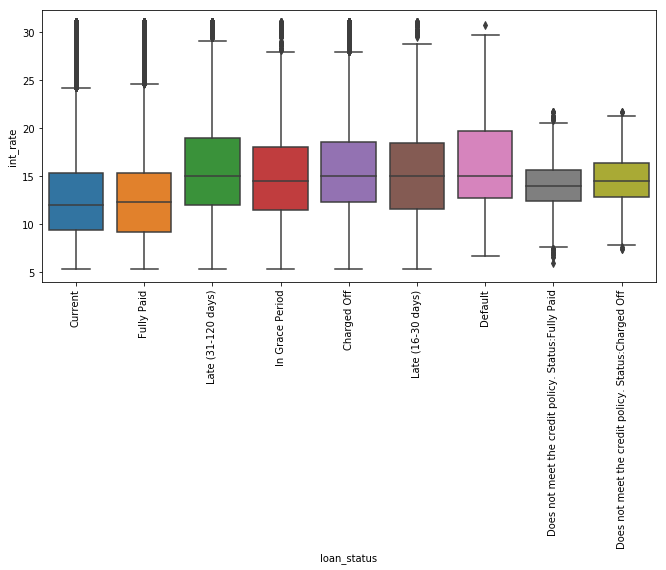

In [6]:
# boxplot for int_rate
plt.figure(figsize = (11,5))
ax = sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.setp(ax.get_xticklabels(), rotation=90)

Loans that didn't perform well are those whose loan status feature are either one of the late categorical values or default.

Get the records that are 'Late' or in 'Default' including 'Charged Off', assign to late_df variable and print out descriptive statistics.

In [7]:
# initial pass, info for 'Late'/'Default' records
late_bool = df['loan_status'].isin(['Late (16-30 days)',
              'Late (31-120 days)', 'Default', 'Charged Off'])
late_df = df[late_bool.values]
late_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287320 entries, 1777 to 2260655
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 320.0+ MB


In [8]:
late_df['int_rate'].describe()

count    287320.000000
mean         15.709040
std           4.939532
min           5.310000
25%          12.290000
50%          15.040000
75%          18.550000
max          30.990000
Name: int_rate, dtype: float64

Also get the records that are fully paid and print out descriptive statistics.

In [9]:
paid_df = df[df['loan_status'] == 'Fully Paid']
paid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041952 entries, 100 to 2260664
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 1.1+ GB


In [10]:
paid_df['int_rate'].describe()

count    1.041952e+06
mean     1.264076e+01
std      4.520709e+00
min      5.310000e+00
25%      9.170000e+00
50%      1.229000e+01
75%      1.531000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

# 4. Methods

There are >287k records that are late and >1M records that are fully paid.  Sample size is not an issue, although the fully paid sample size is larger.

An A/B test will be used to determine if there's a significant difference in the sample means.  And if so, a confidence internval will be calculated.



In [11]:
# check for nan, paid
paid_df['int_rate'].isna().sum()

0

In [12]:
# check for nan, late
late_df['int_rate'].isna().sum()

0

There are no na records in either the paid or late data.

Before running a statistic test, determine if the distributions are normal.

DescribeResult(nobs=1041952, minmax=(5.31, 30.99), mean=12.640755370688865, variance=20.4368071169162, skewness=0.74788411584687, kurtosis=0.6430270221386412)


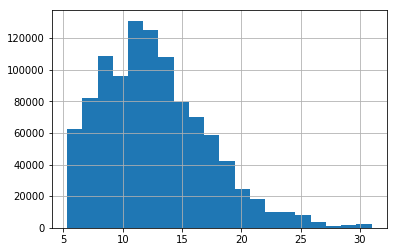

In [13]:
# histogram for fully paid
print(stats.describe(paid_df['int_rate']) )
paid_df['int_rate'].hist(bins=20)

DescribeResult(nobs=287320, minmax=(5.31, 30.99), mean=15.709039990254768, variance=24.39897423734772, skewness=0.579944262902025, kurtosis=0.1999527611431322)


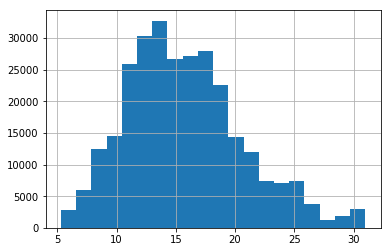

In [14]:
# histogram for late
print(stats.describe(late_df['int_rate']) )
late_df['int_rate'].hist(bins=20)

Parameters have some skewness/kurtosis but look normal, ready to run a t-test

In [15]:
# run t-test 
stats.ttest_ind(paid_df['int_rate'], late_df['int_rate'])

Ttest_indResult(statistic=-315.5548171583103, pvalue=0.0)

The p-value of the t-test is <0.05, which means we can reject the null hypothesis. There is a significant differnce between the interest rates charged for loans that were fully paid versus loans that are either late or in default.

# 5. Results

There is a significant difference for interest rate charged for loans that are delinquent vs loans that were paid off.  This interest rate is a fixed rate and determined when the loan was originated.  

To determine the exact value of the difference, a confidence interval can be calculated.

In [16]:
# confidence interval, from lecture
import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(late_df['int_rate'],paid_df['int_rate'])

'The difference in means at the 95% confidence interval (two-tail) is between -3.0883239423468005 and -3.0482452967604345.'


Loans that were fully paid off have an interest rate about 3% below loans that are late.

In general, Lending Club's risk model is performing acceptably (loans that are late have higher interest rate versus loans that are paid off).

# 6. Discussion

Since there are quite a few records, the risk model performance can be further evaluated by reviewing its performance vs geographical areas (zip code, state), funded_amount, verification status etc.  Such analysis could lead to tweeks in the risk model algorithm.